## [使用Python爬虫爬取豆瓣影评](https://blog.csdn.net/faxingzhongjian/article/details/135162529)

In [46]:
import requests
from lxml import etree
import parsel
import csv

In [47]:
page = 0
url = f'https://movie.douban.com/subject/35633650/comments?start={page}&limit=20&sort=new_score&status=P'
print(url)
# 改成自己的！
headers = {
    'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'Cookie' : 'bid=jRrJ4GZ1pfY; _pk_id.100001.4cf6=48a1331be8322404.1713623669.; _pk_ses.100001.4cf6=1; ap_v=0,6.0; __utma=30149280.392054908.1713623670.1713623670.1713623670.1; __utmc=30149280; __utmz=30149280.1713623670.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __utma=223695111.231643814.1713623670.1713623670.1713623670.1; __utmb=223695111.0.10.1713623670; __utmc=223695111; __utmz=223695111.1713623670.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __gads=ID=d3a2c4bf7e90ebe3:T=1713623673:RT=1713623673:S=ALNI_MZjwWfSQsAMDelBtY5EU6ghe-KHWA; __gpi=UID=00000de50870f7bb:T=1713623673:RT=1713623673:S=ALNI_MZh9XA-c_svEd6-RdVypnon7GFBBA; __eoi=ID=b622308785fd9187:T=1713623673:RT=1713623673:S=AA-AfjZEUKBYY9RHIcPBTok4oFf3; ll="118282"; _vwo_uuid_v2=DB853DE0C9E2302BF81133F566EC7D2BD|13bf265f4576e9e538d5f79662f1e940; __utmb=30149280.4.9.1713623735317; FCNEC=%5B%5B%22AKsRol8_AOnOvjGIS4ME6FtLpW8p36JViTwIJy4aQwmNSCfywFWoIdeqOXRi0xqPm_SKojTIQPzDLWYjeypMvpCf7lYtp8RacIpbgLj3JCxAWAksMtiU71_1nTI1pJfUBjAR2Im3ZNQ1Xwxvca3_dyqSMvkSCIxUGA%3D%3D%22%5D%5D'
}

https://movie.douban.com/subject/35633650/comments?start=0&limit=20&sort=new_score&status=P


In [48]:
res = requests.get(url=url, headers=headers).text

In [49]:
selector = parsel.Selector(res)
comment_list = selector.css('.comment-item')

In [55]:
import re
comments_dict = {}
for index, comment in enumerate(comment_list):
    comments_dict[index] = {
        'name' : '',
        'content' : '',
        'stars' : 0,
        'upvote' : 0,
        'time' : 0,
        'location' : ''
                           }
    name = comment.css('.comment-info a::text').get().strip()
    content = comment.css('.comment-content span::text').get().strip()
    upvote = comment.css('.votes::text').get()
    time = comment.css('.comment-time').attrib['title'].split(' ')[0]
    location = comment.css('.comment-location::text').get()
    
    
    class_attribute = comment.css('.rating').attrib['class']
    stars = re.search(r'\d+', class_attribute).group()[0]
    
    
    comments_dict[index]['name'] = name
    comments_dict[index]['content'] = content
    comments_dict[index]['stars'] = stars
    comments_dict[index]['upvote'] = upvote
    comments_dict[index]['time'] = time
    comments_dict[index]['location'] = location



In [56]:
comments_dict

{0: {'name': 'FryourBalcony',
  'content': '1. 同意在任何一段关系里都不应该有一方迷失自我，并且也不应该把责任推到另一方身上。最重要的是在一开始就不要做出牺牲自己的决定。2.如果把片中夫妻处境对调，会发现丈夫的处境其实是现实中大部分的女性正在经历的困境，然而社会早已习惯这种对女性的无形压迫。当受压迫者变成男性，并且他为此自杀，所有人（包括观众）的第一反应都是-不可能。',
  'stars': '4',
  'upvote': '13063',
  'time': '2023-10-16',
  'location': '加拿大'},
 1: {'name': 'Ciciaego',
  'content': '应该给狗狗也颁发一个最佳演技奖！',
  'stars': '4',
  'upvote': '9554',
  'time': '2023-10-01',
  'location': '加拿大'},
 2: {'name': '松木梯子',
  'content': '没有哪一种生活能经受得住抽丝剥茧的审问与反刍。',
  'stars': '5',
  'upvote': '11888',
  'time': '2023-10-15',
  'location': '湖北'},
 3: {'name': 'April劈里啪啦',
  'content': '戛纳看的  巨好看 我超级喜欢 我觉得所有有过长期稳定relationship/经历过恐惧失败情绪低谷/对bias有体会的人都能深深的relate到',
  'stars': '5',
  'upvote': '3571',
  'time': '2023-05-22',
  'location': '英国'},
 4: {'name': 'momo',
  'content': '极优秀的视听手法。一种颠倒于大多数家庭的男女分工，选择这样安排很有巧思，安排女主双性恋的身份也像是一种创意性的加码。庆功宴上女主捧住律师脸颊的那一瞬我真的在握紧拳头祈祷千万不要亲上去，实在是太害怕前功尽弃毁于一旦了，还好我可以信任导演不会犯这种愚蠢的错误。女主打电话是以询问而非告知的语气问儿子今晚是否可以回家，看到这里是哪位东亚女儿轻轻破防了我不说😿',
  'stars': 

### 完整代码

In [4]:
import requests
from lxml import etree
import parsel
import csv
import re
import time as t

headers = {
    'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'Cookie' : 'bid=jRrJ4GZ1pfY; _pk_id.100001.4cf6=48a1331be8322404.1713623669.; _pk_ses.100001.4cf6=1; ap_v=0,6.0; __utma=30149280.392054908.1713623670.1713623670.1713623670.1; __utmc=30149280; __utmz=30149280.1713623670.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __utma=223695111.231643814.1713623670.1713623670.1713623670.1; __utmb=223695111.0.10.1713623670; __utmc=223695111; __utmz=223695111.1713623670.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __gads=ID=d3a2c4bf7e90ebe3:T=1713623673:RT=1713623673:S=ALNI_MZjwWfSQsAMDelBtY5EU6ghe-KHWA; __gpi=UID=00000de50870f7bb:T=1713623673:RT=1713623673:S=ALNI_MZh9XA-c_svEd6-RdVypnon7GFBBA; __eoi=ID=b622308785fd9187:T=1713623673:RT=1713623673:S=AA-AfjZEUKBYY9RHIcPBTok4oFf3; ll="118282"; _vwo_uuid_v2=DB853DE0C9E2302BF81133F566EC7D2BD|13bf265f4576e9e538d5f79662f1e940; __utmb=30149280.4.9.1713623735317; FCNEC=%5B%5B%22AKsRol8_AOnOvjGIS4ME6FtLpW8p36JViTwIJy4aQwmNSCfywFWoIdeqOXRi0xqPm_SKojTIQPzDLWYjeypMvpCf7lYtp8RacIpbgLj3JCxAWAksMtiU71_1nTI1pJfUBjAR2Im3ZNQ1Xwxvca3_dyqSMvkSCIxUGA%3D%3D%22%5D%5D'
}
comments_dict = {}
page = 0

while True:
    url = f'https://movie.douban.com/subject/36149032/comments?start={page}&limit=50&sort=new_score&status=P'
    print(url)
    res = requests.get(url=url, headers=headers).text
    selector = parsel.Selector(res)
    comment_list = selector.css('.comment-item')
    if len(comment_list) == 0:
        break
    for i, comment in enumerate(comment_list):
        index = i + page
        comments_dict[index] = {
            'name' : '',
            'content' : '',
            'stars' : 0,
            'upvote' : 0,
            'time' : 0,
            'location' : ''
                            }
        try:
            name = comment.css('.comment-info a::text').get().strip()
        except:
            name = ''
        try:
            content = comment.css('.comment-content span::text').get().strip()
        except:
            continue
        upvote = comment.css('.votes::text').get()
        time = comment.css('.comment-time').attrib['title'].split(' ')[0]
        location = comment.css('.comment-location::text').get()
        
        try:
            class_attribute = comment.css('.rating::attr(class)').get()
            stars = re.search(r'\d+', class_attribute).group()[0]
        except:
            stars = 0

        comments_dict[index]['name'] = name
        comments_dict[index]['content'] = content
        comments_dict[index]['stars'] = stars
        comments_dict[index]['upvote'] = upvote
        comments_dict[index]['time'] = time
        comments_dict[index]['location'] = location

    page += 50
    t.sleep(random.uniform(0.5, 1)) # 随机等待时间是0.5秒和1秒之间的一个小数

print("====================================")
print(len(comments_dict))
    
    

https://movie.douban.com/subject/36149032/comments?start=0&limit=50&sort=new_score&status=P
https://movie.douban.com/subject/36149032/comments?start=50&limit=50&sort=new_score&status=P
https://movie.douban.com/subject/36149032/comments?start=100&limit=50&sort=new_score&status=P
https://movie.douban.com/subject/36149032/comments?start=150&limit=50&sort=new_score&status=P
https://movie.douban.com/subject/36149032/comments?start=200&limit=50&sort=new_score&status=P
https://movie.douban.com/subject/36149032/comments?start=250&limit=50&sort=new_score&status=P
https://movie.douban.com/subject/36149032/comments?start=300&limit=50&sort=new_score&status=P
https://movie.douban.com/subject/36149032/comments?start=350&limit=50&sort=new_score&status=P
https://movie.douban.com/subject/36149032/comments?start=400&limit=50&sort=new_score&status=P
https://movie.douban.com/subject/36149032/comments?start=450&limit=50&sort=new_score&status=P
https://movie.douban.com/subject/36149032/comments?start=500&li

### 数据分析

* 星星⭐

In [5]:
# 初始化一个字典来存储每个星级的评论数量
stars_count = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}

all_star = 0
all_val = 0

# 遍历comments_dict中的所有评论
for comment in comments_dict.values():
    # 将星级转换为整数
    stars = int(comment['stars'])
    upvote = int(comment['upvote'])
    # 增加对应星级的计数
    stars_count[stars] += 1
    all_star += stars * upvote
    all_val += 5 * upvote

# 打印每个星级的评论数量
for star in sorted(stars_count.keys()):
    print(f"星级 {star} 的评论数量: {stars_count[star]}")
    
star_avg = all_star / all_val
star_avg = star_avg * 100
print(f"点赞加权的平均星级: {star_avg:.2f}")

星级 1 的评论数量: 1
星级 2 的评论数量: 5
星级 3 的评论数量: 23
星级 4 的评论数量: 37
星级 5 的评论数量: 84
点赞加权的平均星级: 87.83


### 词云展示

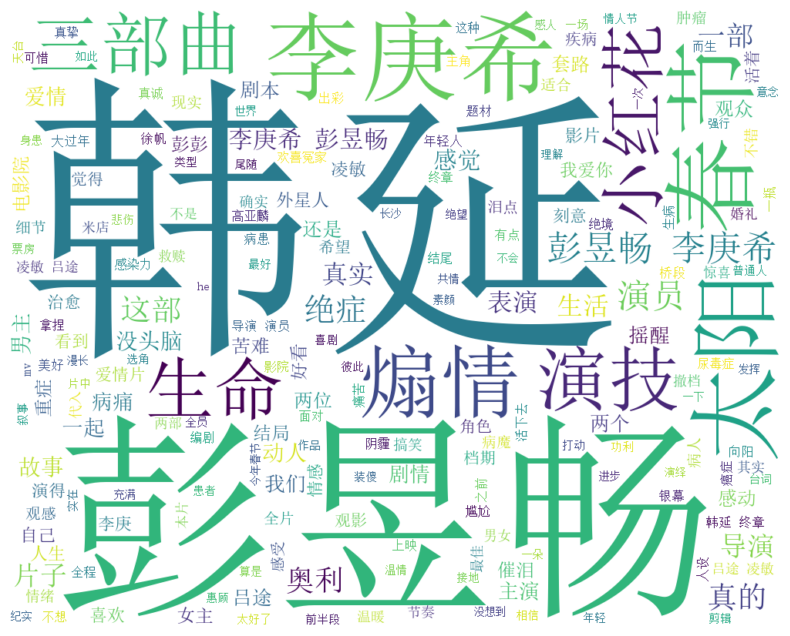

In [8]:
import jieba
import jieba.analyse
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 构建停用词列表
stopwords = set([
    '的', '和', '是', '我', '你', '在', '了', '不', '就', '都','大',
    '也', '有', '没有', '或者', '一个', '一些', '这个', '那个',
    '这样', '那样', '什么', '怎么', '哪里', '时候', '可以',
    '因为', '所以', '但是', '如果', '虽然', '不过', '就是',
    '上', '下', '前', '后', '左', '右', '里', '外', '这边',
    '那边', '其他', '另外', '任何', '这么', '那么', '非常',
    '很', '最', '是否', '已经', '曾经', '一直', '从来', '得到',
    '失去', '许多', '多数', '少数', '一点', '大多', '多', '少',
    '这么', '那么', '那样', '怎样', '怎样', '谁', '哪儿', '什么',
    '怎么样', '怎样', '为啥', '怎么', '怎样', '哪个', '哪些',
    '哪些', '怎样', '哪些', '为什么', '乃', '及', '与', '冲', '同',
    '跟', '给', '自', '至', '向', '往', '被', '自', '致', '到',
    '们', '所', '让', '将', '把', '被', '比', '从', '做', '地',
    '她', '他', '她们', '他们', '它们', '首先', '其次', '最后',
    '然而', '即使', '一方面', '另一方面', '另外', '此外', '再者',
    '又', '加上', '关于', '对于', '至于', '虽然', '尽管', '难道',
    '仍旧', '如果', '只有', '只要', '并且', '而且', '或许', '大概',
    '可能', '也许', '直到', '除非', '不管', '无论', '是否', '莫非','电影'
])

# 初始化一个空列表来存储处理后的文本
processed_strings = []

# 预处理每个评论内容，并将其添加到processed_strings列表中
for comment in comments_dict.values():
    # 提取关键词并用空格连接
    keywords = ' '.join(jieba.analyse.extract_tags(comment['content'], topK=20, withWeight=False))
    # 将处理后的文本添加到列表中
    processed_strings.append(keywords)

# 将所有处理后的文本连接成一个单独的字符串
string = ' '.join(font for font in processed_strings if font not in stopwords)

# 创建词云对象，并生成词云
wc = WordCloud(
    background_color='white',
    width=1000,
    height=800,
    font_path = r'C:\Windows\Fonts\SIMSUN.TTC',  # 指定字体路径
    stopwords=stopwords,
    max_words=200  # 显示的最大词数
)

# 生成词云
wc.generate(string)

# 使用matplotlib显示词云图
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # 不显示坐标轴
plt.show()

### 保存

In [6]:
import pandas as pd

# 将字典转换为DataFrame
df = pd.DataFrame(comments_dict).T  # 使用.T转换为DataFrame

# 保存DataFrame到CSV文件
df.to_csv('./data/comments.csv', mode='a', index=False, encoding='utf-8-sig')

print("评论数据已保存到本地文件。")

评论数据已保存到本地文件。


In [5]:
comments_dict

{0: {'name': '席雨',
  'content': '吕途联系上唐志军了吗',
  'stars': '4',
  'upvote': '1264',
  'time': '2024-02-11',
  'location': '江苏'},
 1: {'name': '嘟嘟熊之父',
  'content': '摸准了大众在大银幕上所能接受的苦难最大值，非常“清醒”的导演。借用现实中的绝境，又完美避开了绝境中的一切黑暗，径直走向光明，已无法从这样泛化伤痛、回避私欲、用统一格式的善良归拢一切的电影中汲取到更多能量。两位演员的表演的确是标杆级的，希望他们横扫奖项，再心无旁骛地去演一部真正的爱情片。',
  'stars': '3',
  'upvote': '730',
  'time': '2024-02-10',
  'location': '陕西'},
 2: {'name': 'Disneyboy',
  'content': '韩延用同一个套路拍了三部绝症电影，我的天啊，没见过这么消费绝症病人的导演。',
  'stars': '1',
  'upvote': '910',
  'time': '2024-02-10',
  'location': '北京'},
 3: {'name': 'WIKI魏',
  'content': '身边的人永远不会知道。我最近经常觉得好累，好苦，孤独，无助，绝望，喘不过气，成宿成宿失眠，身体疲惫得抖，头疼欲裂，但就是睡不着只能睁着眼看日出，时常觉得走到绝路，精神内耗严重。《我们一起摇太阳》两个主角我能懂他们的邋遢，因为得将所有的力气用来活着。结尾他们都从困境中冲了出来。\n在开年的时候，这样一部电影，有了意义，大家可以来找些力量。当我们遇到生活的“阴霾”，往前走，挺一挺，得把太阳“摇醒”，可能会遇到同路人，可能会迎来转机。2024，新的开始，撒欢儿地活吧！',
  'stars': '4',
  'upvote': '1936',
  'time': '2024-02-10',
  'location': '黑龙江'},
 4: {'name': '不留痕迹',
  'content': '韩延绝症三部曲最佳，素颜雀斑的李庚希和胡子拉碴的彭昱畅化学反应十足，比起小红花那一对的青靓白净实在像病人太多。对病痛的恐惧和